## CLASS 3 AGENDA
* **Address questions/concerns from class 2**
* **Introducing the pandas library**
* **Working with the movielens movie ratings dataset**
* **Combining datasets (next notebook)**
* **Homework: NYC Taxi Data (2 notebooks)**

As is almost always the case when working with **Python**, we are going to need more than just its basic functionality available to us as we develop our analytical pipelines. 

In order to have this additional functionality available (being able to use **pandas**), we will rely on a  couple `import` statements.

Here they are:

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.simplefilter('ignore')

The code above did two things:

* Loaded in all of the functionality that **pandas** provides (`import pandas as pd`)
* Loaded in some additional functionality from a different package that **pandas** relies on called **NumPy** (`import numpy as np`)

Importantly, `pd` is now the alias (new name) for the entire `pandas` library and `np` is the alias for the `numpy` library. Instead of having to type `pandas.something` or `numpy.something` to access a given function, you can now just type `pd` or `np`. 

So what exactly is [**pandas**](http://pandas.pydata.org) and why the funny name (we will talk about [**NumPy**](http://www.numpy.org) a bit later)?

**pandas** is a Data Analysis Library written in and for the **Python** programming language and is a very loose acronym for **P**ython **An**alysis of **Da**taset**s** (or something like that anyway). 

It provides open source, easy-to-use data structures and data analysis tools and we will be relying on it heavily for the remainder of the course. Let's check the versions of `numpy` and `pandas` we are running:

In [2]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.20.3
Numpy version: 1.13.1


So, lets begin by loading in our first dataset, the Movielens 1M dataset.

This is a file that contains ~1,000,000 movie ratings taken from a website where users can rate a variety of movies on a 1-5 rating scale. Each rating is comprised of the following information:

* A user id, represented by a number (an `int`) 
* A movie id, also an `int` 
* A rating, an `int` that should vary from 1-5 (inclusive) 
* A timestamp, recording when the rating was made in seconds since UNIX epoch time (this is standardly set to 12:00AM January 1, 1970), also an `int`

The records in this file are arranged in the following order and format:

`UserID::MovieID::Rating::Timestamp`

We will use the `read_csv` function in pandas and try to simply load the dataset **as is** into a variable (actually an object) called `ratingData` and see if that gets it into a usable format (it won't).

In [3]:
ratingData = pd.read_csv("../data/ratings.dat")

If you look at the documentation for `read_csv`, you'll see that it is very large and provides for lots of different functionality. 

As a first pass, we just passed the path to the file in as a ```string``` to the `read_csv` function, without any other arguments. 

Lets take a look at the first few rows and see what we get using the `head` function on our newly loaded dataset `ratingData`. 

The `head` function returns the first 5 rows by default of the DataFrame you call it on. You can change it to be a larger or smaller number by passing in a positive `integer` into `head` as an argument like so: `ratingData.head(100)`.

The function `tail` does the exact same thing, except with the last records in the dataset.

In [4]:
ratingData.head(20)

,1::1193::5::978300760
0,1::661::3::978302109
1,1::914::3::978301968
2,1::3408::4::978300275
3,1::2355::5::978824291
4,1::1197::3::978302268
5,1::1287::5::978302039
6,1::2804::5::978300719
7,1::594::4::978302268
8,1::919::4::978301368
9,1::595::5::978824268


Ok, well that looks terrible.
Lets diagnose the problems we see and make it unterrible: 

1. Everything is in a single column (so we can't separately look at ratings, user ids,movie ids, or timestamps)!
2. The first row is used as the name of the only column (we call this the **header**), which is no good, as the first record shouldn't be the header, but an actual record.
3. The timestamp is in a format that doesn't really tell us anything useful about when the ratings occurred.

So, lets use some of the additional functionality of `read_csv` to load this dataset in cleanly, and hopefully that will solve problems **1 and 2**.

In [6]:
ratingData = pd.read_csv("../data/ratings.dat",
                         sep = "::",
                         names = ['UserID','MovieID','Rating','Timestamp'])
ratingData.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Don't worry about the `ParserWarning:` message (if you get one) as it doesn't affect what we are doing, and lets just take a look at the data now. I'll explain exactly what I did below.

In [88]:
ratingData.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [89]:
# try putting a number in between the parentheses () in the .head() function below
#YOUR CODE HERE
ratingData.tail(20)

,UserID,MovieID,Rating,Timestamp
1000189,6040,2010,5,957716795
1000190,6040,2011,4,956716113
1000191,6040,3751,4,964828782
1000192,6040,2019,5,956703977
1000193,6040,541,4,956715288
1000194,6040,1077,5,964828799
1000195,6040,1079,2,956715648
1000196,6040,549,4,956704746
1000197,6040,2020,3,956715288
1000198,6040,2021,3,956716374


MUCH BETTER!

So, what did we just do?

The function `read_csv` has lots of functionality, as I had mentioned (and as you saw when you pulled up its documentation). One of its options is called `sep`, and allows you to provide your own separator for dividing the columns that you have in your dataset. 

The default separator for `read_csv` is the comma (`,`), since `csv` stands for **c**omma **s**eparated **v**alues. 

However, since `::` separated the fields in this dataset, we supplied that as an argument (again, as a `string`) to the argument `sep` instead.

A separate argument, `names`, allows you to pass in your own list of names, again as `strings`, to `read_csv` to be treated as the column names (or the **header**) of the dataset. Since we knew what the names for the columns should be, we put them in.

Now that our dataset looks more reasonable, lets do a couple brief sanity checks and then fix issue **3.**

Lets do a sanity check and make sure that:

1. All our data is in the format that we expect (everything is an `int`).
2. The ratings range across the values we expect (1-5 and nothing else).

The property `dtypes` is accessible from our `ratingData` object, and tells us the types of the data in all of our columns (which addresses **1.**).

In [7]:
ratingData.dtypes

UserID       int64
MovieID      int64
Rating       int64
Timestamp    int64
dtype: object

Ok, so everything appears to be an `int` as `int64` is an `integer` (positive or negative whole number) data type that can represent very large numbers.

As an important aside about **pandas**, all the values in a given column have to be of the same type. So, **if even one value was not a whole number, (1.0 for example), the values for the entire column would be inferred to be something else (either a `float64` or an `object` if any of the entries were `strings`).**

Now let's address **2.** by looking at all of the unique entries in the `Rating` column using `unique` (we expect there to be 5 unique values, 1-5 inclusive).

As long as your column names do not contain strange characters (spaces and escape characters like !\/), you can simply access the values in a column by doing `dataFrameName.columnName` where `dataFrameName` is the name of your `DataFrame` object and `columnName` is the name of your column.

The function `unique` is accessible from our `ratingData` object, and simply returns all of the unique values within our column of choice as a `List`. You can also use `nunique` to simply return the number of distinct elements (as opposed to the elements themselves:

In [8]:
print("Unique values:",ratingData.Rating.unique())
print("Number of unique values:",ratingData.Rating.nunique())

Unique values: [5 3 4 2 1]
Number of unique values: 5


In [10]:
# try calling the .unique() function by using other column names in the dataset.
# Data science is all about getting to know your data, so get to know the unique values of the columns in the dataset!
#YOUR CODE HERE
ratingData['Rating'].value_counts()


4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

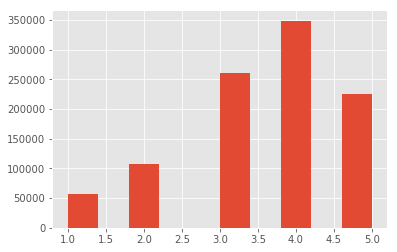

In [13]:
ratingData['Rating'].hist()

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


However, if your dataset contains weird column names, you have another way of accessing columns:

In [93]:
ratingData["Rating"].unique()

array([5, 3, 4, 2, 1])

In this way of accessing the `Rating` column, we have to pass the name of the column as a `string` (in quotes "").

What if we wanted to access multiple columns? Here's how you would do that (this is the only way):

In [15]:
ratingData[["Rating","UserID"]]
##OR
multipleColumns = ["Rating","UserID"]
ratingData[multipleColumns]

ratingData.sample(50)

,UserID,MovieID,Rating,Timestamp
739802,4422,2826,4,965118108
705252,4227,2554,4,965411136
243408,1467,3649,3,974753482
893366,5394,1390,3,981004657
321742,1908,1004,2,974698430
719158,4306,1717,2,965263670
143433,925,915,3,975198620
996371,6016,1231,4,956957751
950750,5744,553,4,959994793
184055,1146,2377,3,974932620


In the multi-column case, you must pass the columns you are interested in as a `List` of `string` values (or as a `variable` that points to that list).

In [95]:
# pass in other multiple columns in as column names into the ratingData object
#YOUR CODE HERE

Now, on to fixing issue **3**.

**pandas** has pretty fantastic date conversion functionality, as long as you know the format of the date data you are using. We know the format of our `Timestamp` column, so we are good to go.

As a refresher, it was seconds since epoch time (12:00AM January 1, 1970).

The pandas library has a function called `to_datetime` that, when given a column, and some optional parameters, converts the timestamp into nice, prettily formatted text.

Lets create a new column called `FormattedTimestamp` by formatting our `Timestamp` column:

In [17]:
ratingData['FormattedTimestamp'] = pd.to_datetime(ratingData.Timestamp,unit = 's')
ratingData.FormattedTimestamp.sample(50)

962008   2000-05-12 15:17:33
304890   2001-05-06 16:06:29
941949   2000-06-17 18:37:48
856953   2000-06-26 10:29:02
326240   2001-03-05 01:24:50
381230   2000-11-19 01:51:44
379676   2000-11-19 02:02:17
487640   2000-10-04 00:55:58
6506     2000-12-28 04:44:18
189541   2000-11-23 17:42:07
809775   2000-07-05 21:09:35
82165    2000-12-06 02:18:02
800398   2000-07-07 17:40:18
926920   2000-05-24 23:39:11
954423   2000-05-13 12:00:53
648434   2000-08-08 20:02:50
987601   2000-04-29 15:28:07
158415   2001-02-11 02:39:25
385196   2000-11-19 02:12:56
390317   2000-11-18 03:18:11
466535   2000-10-24 04:47:21
168737   2000-11-23 01:31:19
528562   2000-09-06 03:50:07
446771   2000-11-10 22:07:00
574538   2000-09-18 14:52:15
361898   2000-11-19 17:48:40
501864   2000-09-24 13:17:00
624479   2000-08-11 22:58:45
622005   2000-08-12 07:51:23
742587   2000-08-01 02:40:03
34152    2000-12-14 19:54:43
914817   2000-06-03 01:33:42
186002   2000-11-22 05:21:49
71020    2000-12-07 20:00:01
741596   2000-

Ok, there is a lot going on here, we are creating a new column `FormattedTimestamp` from a computation on another column, so lets work through it. 

To create a new column, you just use the same syntax as when you want to select a column, except you use a name that isn't found in the dataset's column list. 

Everything following the `=` sign in the expression is what you want to put into that new column.

And what we did following the equals sign is:

1. We passed the `Timestamp` column of our ratingData dataset as a mandatory parameter.
2. We supplied an optional string parameter called `unit` with the unit of our data as a `string`.

(Look at the documentation, and you can see there is lots more stuff you can do with `to_datetime`!).

Now, we can simply remove the old `Timestamp` column, since we don't need it anymore!

To do so, you simply pass the name of the dataframe and the column you are trying to delete to the `del` function:

In [18]:
print("Columns before removal: ", ratingData.columns)
del ratingData["Timestamp"]
print("Columns after removal: ", ratingData.columns)

Columns before removal:  Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'FormattedTimestamp'], dtype='object')
Columns after removal:  Index(['UserID', 'MovieID', 'Rating', 'FormattedTimestamp'], dtype='object')


The `del` operation simply deletes the columns you specify from the given `DataFrame`. Remember that once you've deleted a given column, you can't delete it again, so executing the above cell muliple times will throw an error.

One more thing about dates before we move on, once you've got them converted to the pretty format we saw above, you can access all kinds of information from each date by calling the `dt` module from within the column that stores your dates.

So, as an example, getting the year of every row in our dataset is as simple as:

In [19]:
ratingData['day_of_month'] = ratingData.FormattedTimestamp.dt.day

In [20]:
ratingData[['day_of_month','FormattedTimestamp']].sample(40)

,day_of_month,FormattedTimestamp
908516,15,2000-06-15 23:34:32
375069,19,2000-11-19 04:41:20
151616,25,2000-11-25 03:29:16
993794,3,2000-06-03 04:19:05
621069,16,2000-08-16 13:58:17
860667,24,2000-06-24 14:50:58
138276,26,2000-11-26 16:12:45
527420,6,2000-09-06 14:53:23
364030,19,2000-11-19 15:04:53
784246,25,2000-07-25 23:09:56


Other properties (like day, hour, day of month, etc.) are available as well.

Again, just check the [timestamp documentation.](http://pandas.pydata.org/pandas-docs/stable/timeseries.html).

In [99]:
#try using the other functions found in the dt module: call ratingData.FormattedTimestamp.dt. and the Tab key
#to see what else is offered
#YOUR CODE HERE




One note about the outputs of calling these datetime **properties.** When you call the property on a single value (like a single row) or on an entire column you will get a `Series` object returned to you, which is the **pandas** representation of a single column.

`Series` objects are different from `DataFrame` objects (which we've been working with exclusively thus far) because they can be appended (attached) as new columns to your dataset (which is already a `DataFrame` object) without any problems.

So if you want to store the `year` of every row in a new column called `year` then do:

In [21]:
ratingData["year"] = ratingData.FormattedTimestamp.dt.year

In [22]:
#make another column called "month" and call the appropriate function to store the month of each rating
#do the same thing for "day", just to get a good handle on the kinds of things you can do
#YOUR CODE HERE

ratingData["month"] = ratingData.FormattedTimestamp.dt.month

Let's move on and get a better feel for our dataset now.

What if we wanted to know the exact shape of our dataset? That is, the *exact* number of rows and columns found in it? (I told you there were ~1,000,000 ratings here, but exactly how many are there?

We can use another **property** that is available in our `ratingData` object called `shape`:

In [23]:
(numRows,numColumns) = ratingData.shape

In [24]:
print(numRows)
print(numColumns)

1000209
7


The `shape` property (which doesn't have any documentation, unfortunately), tells us the number of dimensions and the number of values in each dimension in our dataset (we can have 1, 2, or more dimensions in our dataset, after all), as a tuple (a very common datatype in **Python** that is of a fixed size and cannot be changed).

As a brief aside, you saw that I just said **property** and not **function** right? 

That means, this value is available to us as part of the dataset intrinsically and cannot be changed based on inputs (in CS parlance, it is read-only), and doesn't have to be called like `unique(), head(), tail(), max(), mean()` and all the other functions that are re-computed on the dataset because they can effectively change! 

(Another example property that is available to you and that you've already used is `dtypes`)

Ok, back to `shape`.

The number of dimensions in our dataset is the arity of the tuple (the number of commas + 1) and the numbers between commas tell us the number of distinct values in that dimension. So the **arity is 2 because all we have are rows and columns.** 

So, we have **1,000,209 distinct values in the first dimension** (here they are our ratings, or **rows**) and **4 distinct values in the second dimension** (here the second dimension is our **columns**, and is as we expect, since we just added a new column and deleted an old one).

Now that you have a bit of **pandas** functionality at your disposal, you should give me the answer to the following questions by writing a bit of code:

1. How many users are there in the dataset?
2. How many movies are in the dataset?
3. How many unique times are in the dataset?

**Hint: All you need is the `unique()` function and the `shape` property to answer these questions!**

In [26]:
##WRITE YOUR CODE HERE, replace "pass" with your code in all 3 cases
numUsers = ratingData.UserID.unique().shape
numMovies = ratingData.MovieID.unique().shape
numTimes = ratingData.FormattedTimestamp.unique().shape

print("There are",numUsers[0],"unique users,",numMovies[0],\
" unique movies, and",numTimes[0],"unique times in this dataset.")

There are 6040 unique users, 3706  unique movies, and 458455 unique times in this dataset.


In [105]:
ratingData.FormattedTimestamp

0         2000-12-31 22:12:40
1         2000-12-31 22:35:09
2         2000-12-31 22:32:48
3         2000-12-31 22:04:35
4         2001-01-06 23:38:11
5         2000-12-31 22:37:48
6         2000-12-31 22:33:59
7         2000-12-31 22:11:59
8         2000-12-31 22:37:48
9         2000-12-31 22:22:48
10        2001-01-06 23:37:48
11        2000-12-31 22:29:12
12        2000-12-31 22:38:01
13        2000-12-31 22:35:24
14        2000-12-31 22:29:13
15        2000-12-31 22:36:28
16        2001-01-06 23:37:48
17        2000-12-31 22:29:37
18        2000-12-31 22:28:33
19        2000-12-31 22:33:59
20        2000-12-31 22:36:45
21        2000-12-31 22:12:40
22        2000-12-31 22:00:55
23        2001-01-06 23:36:35
24        2000-12-31 22:01:43
25        2001-01-06 23:39:11
26        2000-12-31 22:32:33
27        2000-12-31 22:00:55
28        2001-01-06 23:35:39
29        2001-01-06 23:37:48
                  ...        
1000179   2000-04-25 23:16:24
1000180   2000-04-26 02:17:35
1000181   

Awesome! You've written your first bit of code using **pandas** and have actually answered some useful questions about this dataset! Pats on the back all around, and lets keep exploring!

Now, let's look at the ratings in the dataset to get a feel for their central values and spread:

In [27]:
print("The average rating in the dataset is:",ratingData.Rating.mean())
print("The middle rating in the dataset is:",ratingData.Rating.median())
print("The standard deviation of the ratings is:",ratingData.Rating.std())

The average rating in the dataset is: 3.581564453029317
The middle rating in the dataset is: 4.0
The standard deviation of the ratings is: 1.1171018453775763


So it looks like the people in our dataset don't like to rate movies too low, as the movies have  an average rating >3 (which is supposed to be average on a 1-5 scale).

The functions `mean`,`median`, and `std` compute exactly what you expect (the mean, median, and standard deviation {or spread} of a given set of values) and can even be applied to the entire dataset (although in our case, that doesnt make too much sense as all the other columns, except `Timestamp` are numeric mappings of categorical data).

In [28]:
ratingData.mean()

UserID          3024.512348
MovieID         1865.539898
Rating             3.581564
day_of_month      15.440691
year            2000.126168
month              8.710371
dtype: float64

In [108]:
ratingData.median()

UserID     3070.0
MovieID    1835.0
Rating        4.0
year       2000.0
month         9.0
dtype: float64

In [109]:
ratingData.min()

UserID                                  1
MovieID                                 1
Rating                                  1
FormattedTimestamp    2000-04-25 23:05:32
year                                 2000
month                                   1
dtype: object

Other descriptive stats can be computed as well (min/max, sum, variance, skew, kurtosis, etc.). Just take a look at the [descriptive statistics](http://pandas.pydata.org/pandas-docs/stable/basics.html#descriptive-statistics) documentation!  

In [110]:
#Look at the descriptive statistics documentation and print a couple more descriptive stats on just the 
#"Rating" column. You get to choose what stats you want to print
#YOUR CODE HERE




Now time for a little trick! 

If you want all these basic statistics and a few more, just use the `describe` function, which works just like the others mentioned above (you can call it on just a single column, or the whole dataset).

In [111]:
ratingData.Rating.value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

Now lets learn how to subselect values within dataframes.

Subselection in **pandas** works along the following very common pattern:

1. You create a condition that can be evaluated to either **true** or **false** for every row in the dataset and store the outcome in a variable (this is traditionally called a **mask**).
2. You apply that **mask** onto your `DataFrame` (dataset).

Let's try this subselection + application with the ratings in our dataset by only getting all of the really low ratings (lets say low ratings are those that are < 3) in our dataset.

We will create a mask that expresses our "crappy ratings" condition, and then apply that mask to our dataset.

In [112]:
crappyRatingMask = ratingData.Rating < 3
print("Crappy rating mask:\n",crappyRatingMask.head())
crappyRatings = ratingData[crappyRatingMask]
crappyRatings

Crappy rating mask:
 0    False
1    False
2    False
3    False
4    False
Name: Rating, dtype: bool


,UserID,MovieID,Rating,FormattedTimestamp,year,month
67,2,1213,2,2000-12-31 21:34:18,2000,12
73,2,434,2,2000-12-31 22:02:54,2000,12
75,2,3107,2,2000-12-31 22:00:02,2000,12
83,2,902,2,2000-12-31 21:41:45,2000,12
91,2,3256,2,2000-12-31 21:57:19,2000,12
114,2,3699,2,2000-12-31 21:46:13,2000,12
125,2,2427,2,2000-12-31 21:58:33,2000,12
133,2,95,2,2000-12-31 22:02:23,2000,12
148,2,21,1,2000-12-31 21:57:19,2000,12
151,2,1090,2,2000-12-31 21:36:20,2000,12


In [113]:
print(crappyRatings.Rating.unique()) # This is a sanity check to make sure that our filtered data contains only low ratings

[2 1]


Awesome, this worked as expected!
How many of these crappy ratings are there? (Replace **pass** in the code cell below with your answer)

In [114]:
pass

Now it is time for you to show how much you've learned. Give me the answers to the following questions:

1. What was the average rating in January?
* What was the average crappy rating in January?

**Hint:** Although there are lots of ways you can tackle these questions (many of which you will learn soon). I suggest you use the following procedure:

1. Create a new column in `ratingData` and call it "month", so that it tells you the month of every row
* Create a new dataset of:
  1. all January records and store it in `januaryRatings`
  * create a mask of crappy ratings using that dataset called `crappyJanuaryRatingsMask`
  * apply that `crappyJanuaryRatingsMask` to your dataset and store it in a new dataset called `crappyJanuaryRatings`
  * compute the mean of the `Rating` column for both `januaryRatings` and `crappyJanuaryRatings`

In [32]:
#Filter data where the month is January
january_ratings = ratingData[ratingData["month"] == 1]

#Calculate the mean
january_ratings['Rating'].mean()

3.542995839112344

In [38]:
ratingData.groupby('month')['Rating'].mean()

month
1     3.542996
2     3.523664
3     3.456952
4     3.522028
5     3.601847
6     3.616528
7     3.617985
8     3.566315
9     3.602279
10    3.609143
11    3.571737
12    3.581435
Name: Rating, dtype: float64

Ok, now that you know how to do some basic subselection, sorting, and calculations on data, we are going to do something a bit more complicated, and start subdividing our data into groups to be able to answer some more general questions about our dataset.

Once you have this functionality down, you will be able to: 

1. Answer more interesting kinds of questions
* Answer the questions above using fewer lines of code 

Lets say you wanted to know or do the following:

1. **In what month did users rate the most movies?**
2. **What month had the highest average rating?**
3. **Remove users with too few ratings (lets say < 30) and reanswer these same questions**

Our approach here will be:

* Learn to use the `groupby` functionality of **pandas** to create subgroups of our ratings based on either the `month` the ratings were given or on the `UserID` of the rater.
* Apply an aggregating function to these groups to return:
  * The `size` of each group (since the `size` of each group is either the number of ratings in that `month` or the number of ratings for that `UserID`)
  * The `mean` of the `Rating` column within each group
  * A filtered version of the original dataset so that only the groups that are large enough (when grouping on `UserID`, those users that have made enough ratings) are returned.

Ok, now that you know how to do some basic subselection, sorting, and calculations on data, we are going to do something a bit more complicated, and start subdividing our data into groups to be able to answer some more general questions about our dataset.

Once you have this functionality down, you will be able to: 

1. Answer more interesting kinds of questions
* Answer the questions above using fewer lines of code 

Lets say you wanted to know or do the following:

1. **In what month did users rate the most movies?**
2. **What month had the highest average rating?**
3. **Remove users with too few ratings (lets say < 30) and reanswer these same questions**

Our approach here will be:

* Learn to use the `groupby` functionality of **pandas** to create subgroups of our ratings based on either the `month` the ratings were given or on the `UserID` of the rater.
* Apply an aggregating function to these groups to return:
  * The `size` of each group (since the `size` of each group is either the number of ratings in that `month` or the number of ratings for that `UserID`)
  * The `mean` of the `Rating` column within each group
  * A filtered version of the original dataset so that only the groups that are large enough (when grouping on `UserID`, those users that have made enough ratings) are returned.

The `groupby` function in **pandas** is analagous to the grouping operations you may be familiar with if you've ever used any **SQL** variants. 

A generic **SQL** translation of **1.**, for example, would look something like:

```
SELECT month,numRatings FROM (SELECT month,size(month) AS numRatings
FROM ratingData
GROUP BY month) WHERE numRatings = MAX(numRatings)
```

(If this looks like wizardry, don't worry, I'm just trying to show this to those users that are familiar with SQL and any of its variants; this is the only SQL you will see all weekend!)

Grouping can get very complicated, but as a first pass you can think of it as a way to split your dataset into non-overlapping subsets along any axis (along rows or columns, in our case). 

The values along which you **group** your dataset are traditionally called **keys**, so **each key should be unique to each group, and each group can have at most one key associated with it** (although the key for identifying each group can be really complicated).

Once you've grouped your dataset, the `GroupBy` object isn't too useful by itself. It becomes useful when you apply a **transformation** to it and get a new dataset back. 

We typically call this **transformation** an **aggregation**, as we are getting some aggregate value back for each group.

The **aggregation** functions we will be using for questions **1.,2.** are `size` and `mean`.

So, enough explaining, lets get to some hacking.

Lets address grouping in the context of answering our first question:

1. **In what month did users rate the most movies?**

In **pandas**, to create groups, you must create a `GroupBy` object (more on what that is later) from your `DataFrame` object (your dataset) by passing the values along which you want to group to the `groupby` function.

We want to **groupby** the **month** column and store it:

In [116]:
monthGroups = ratingData.groupby("month")

This object, called a `DataFrameGroupBy` is a rearranging of the rows in the dataset into distinct collections, called groups. Let's take a look at the groups:

In [117]:
print(monthGroups.describe())

        MovieID                                                         \
          count         mean          std  min     25%     50%     75%   
month                                                                    
1       23072.0  1982.618715  1145.835810  1.0  1079.0  1997.0  2985.0   
2       12128.0  2033.421257  1144.649503  1.0  1120.0  2048.0  3034.0   
3        8537.0  2049.213190  1159.198213  1.0  1125.0  2067.0  3095.0   
4       19407.0  1894.616994  1082.172259  1.0  1077.0  1945.0  2770.0   
5       74278.0  1781.435984  1038.746348  1.0   973.0  1694.0  2664.0   
6       61110.0  1839.469776  1081.725247  1.0  1022.0  1747.0  2761.0   
7       97004.0  1850.288380  1082.951426  1.0  1030.0  1784.0  2762.0   
8      188674.0  1861.912844  1090.439897  1.0  1031.0  1848.0  2762.0   
9       56791.0  1865.036802  1107.869021  1.0  1028.0  1801.0  2792.0   
10      45500.0  1874.683670  1101.660489  1.0  1035.0  1876.0  2774.0   
11     295461.0  1876.639391  1104.688

We can't print `monthGroups` itself, as its not a `DataFrame`, but a rearranged representation:

In [118]:
print(monthGroups)

And then we want to get the number of records (rows) in each group in our `monthGroups` object using the `size` function (which is accessible from this object):

In [119]:
ratingsPerMonth = monthGroups.size()
ratingsPerMonth #this will simply print the result inside of this notebook so we can see it
#to print to the screen outside of the notebook, you would have to say "print ratingsPerMonth"

month
1      23072
2      12128
3       8537
4      19407
5      74278
6      61110
7      97004
8     188674
9      56791
10     45500
11    295461
12    118247
dtype: int64

And just to make it nice and clean, we will simply output the month with the largest number of ratings using the `max` function:

In [120]:
monthWithMostRatings = ratingsPerMonth[ratingsPerMonth==ratingsPerMonth.max()]
monthWithMostRatings #same as above, print to notebook without having to say "print highestRating"

month
11    295461
dtype: int64

Got it? Good!

One more thing before you try it yourself. Once you've created a `groupby` object, you don't have to select everything in the object to perform an aggregation, and can subselect a given column within each group (**Hint, Hint!**)

Now you try answering question **2.**:

2. **What was the average rating given to movies in each month of the year?**

Create the objects `avgMonthlyRatings` and `highestAvgRating`, that allow you to answer the question and print them to the screen:

In [121]:
pass

These aggregations are already implemented in the `GroupBy` object and can be called directly from the object, but this is not generally the way this is handled.

Under the hood, **pandas** is passing the function we apply (`mean` or `size` in our case) to another function called `aggregate` and that function is actually doing the heavy lifting.

**The `aggregate` function operates on the entire group within the groupby, so any group-based operations must use an aggregating function.**

So, what is actually happening when we wrote our code to answer question **1.** above like this:

`ratingsPerMonth = monthGroups.size()`

Was actually being implemented more like this:

``ratingsPerMonth = monthGroups.aggregate(size)``

or this:

``ratingsPerMonth = monthGroups.agg(size)``

So, this means that whenever we want to do more complicated transformations or reductions of our data, on a per-group level, we should supply our function(s) of interest to `aggregate` or the shorhand `agg` function.

A couple more explanations before we tackle filtering for answering question **3.**

You can pass multiple functions to `aggregate` as a `List`, if you want multiple transformations applied to the data, like so:

In [122]:
monthGroups.Rating.agg([np.mean,np.size,np.std])

,mean,size,std
month,,,
1,3.542996,23072,1.075643
2,3.523664,12128,1.089588
3,3.456952,8537,1.079460
4,3.522028,19407,1.096929
5,3.601847,74278,1.137355
6,3.616528,61110,1.110452
7,3.617985,97004,1.092208
8,3.566315,188674,1.122584
9,3.602279,56791,1.113047


In all of these cases, you will notice that we have to call the functions using the **NumPy** module (but using the `np` alias), which was installed when you got **pandas** working on your system (since **NumPy** is a dependency of **pandas** and gives **pandas** all of the math and matrix wrangling functionality it relies on behind the scenes).

**NumPy** is a really powerful matrix and math library in **Python** and has lots of functionality we won't go into here, so if you're interested, head over to their [website](http://www.numpy.org) to learn more!

Now, lets move on to filtering.

Lets go through how to answer question **3.**:

* **Remove users with too few ratings (lets say < 30) and reanswer these same questions**

Here is our pipeline:

1. `groupby ratingData on "UserId"` and call this new `GroupBy` object `userGroups`
* `filter` so that only groups (users) containing > 30 ratings are kept in a new `DataFrame`, called `filteredRatings`
* `groupby filteredRatings on "month"` and call this new `GroupBy` object `filteredMonthGroups`
* recompute `mean` and `size` statistics on the `Rating` column in `filteredMonthGroups` and store it in a variable called `filteredMonthAggs`
* use `max` to see if the month when the largest rating mean and rating size have changed

In [123]:
userGroups = ratingData.groupby("UserID")

This first step is very similar to what we did before, except we are grouping on a different column, `UserID`.

Now comes the more challenging part, using `filter`, and involves learning a bit about **anonymous functions**. Here goes:

In [124]:
def enoughRatings(currGroup):
    return currGroup.Rating.size >= 30

In [125]:
filteredRatings = userGroups.filter(lambda currGroup: currGroup.Rating.size >= 30)
filteredRatings2 = userGroups.filter(enoughRatings)

In [126]:
print(filteredRatings.shape)
print(filteredRatings2.shape)

(982040, 6)
(982040, 6)


**AAAAA WHAT IS THAT? lambda? x? What are these things?**

Ok, lets take a breath and work through this...

The `filter` function takes a function as an input and requires that the function you pass to it return either `True` or `False` on a per-group basis. 

It then returns a new `DataFrame` object, sorted into the groups you grouped on initially, with all of the groups removed that don't satisfy the constraints of the function you passed to it (that is, removing those groups that, when the function is applied to them, return `False`).

So, why are we using this weird `lambda` thing? 

Well, `lambda` is the keyword for creating an **anonymous function** in **Python**.

**anonymous functions** are functions that you define within some restricted place that:

1. Usually accomplish some very minimal functionality
2. Don't need the syntactic sugar that functions usually come with because of 1. and to maintain the compactness (and hopefully clarity) of your code.

To declare an anonymous function you:

1. type `lambda`, followed by
* arbitrary names for the parameters that function accepts (x,y, etc.) separated by commas, followed by
* a colon, which tells **Python** that we are done with specifying the parameters, followed by
* the expression that defines how the function operates on the parameters. This expression will dictate what the function returns.

Here's a really dumb anonymous function, stored in the variable `dumb`:

In [127]:
dumb = lambda x: x + 1
print(dumb(6))

7


So:
`lambda x: x.Rating.size >= 30` means:

1. **This function accepts a single parameter (in our case the group) arbitrarily called x.**
* **It operates on this parameter, x, by finding some attribute in it called "Rating" (which it definitely has from earlier steps) and checking whether its size property is greater than or equal to 30.**
* **Because this function is checking a condition, it will return either `True` or `False` for every parameter you pass to it**

If you understand that, you grok **anonymous functions**.

**However, if you don't understand WTF just happened, you can actually write your own function, and just pass it directly to the filter!**

So, instead of:

`filteredRatings = userGroups.filter(lambda x: x.Rating.size >= 30)`

You can do this (they are functionally equivalent!):
```
def filterFewestRatings(dataset):
    return dataset.Rating.size >= 30
    
filteredRatings = userGroups.filter(filterFewestRatings)
```

Here, we've replaced the variable `x` in the anonymous function with a more easily understood variable `dataset` in the named (non-anonymous) function `filterFewestRatings`. This has the same exact functionality as the **anonymous function**, but is clearly more code to write. 

**It's your choice as to how you want to implement small functions like this.**

Lets look at filtered ratings and see how many ratings and users we eliminated before we recompute our answers:

In [128]:
print("Original number of ratings:",ratingData.shape[0])
print("Filtered number of ratings:",filteredRatings.shape[0])
print("Fraction of ratings eliminated:",(1.0-float(filteredRatings.shape[0])/ratingData.shape[0]))

Original number of ratings: 1000209
Filtered number of ratings: 982040
Fraction of ratings eliminated: 0.0181652034724743


In [129]:
print("Original number of users:",ratingData.UserID.unique().size)
print("Filtered number of users:",filteredRatings.UserID.unique().size)
print("Fraction of users eliminated:",(1.0-float(filteredRatings.UserID.unique().size)/ratingData.UserID.unique().size))

Original number of users: 6040
Filtered number of users: 5289
Fraction of users eliminated: 0.12433774834437084


So we got rid of about 2% of the ratings, but over 12% of the users!

Now that we've filtered, you should be able to do the rest and recompute the answers:

In [130]:
filteredMonthGroups = filteredRatings.groupby("month")
filteredMonthAggs = filteredMonthGroups.Rating.agg([np.mean,np.median,np.std,np.max])

In [131]:
filteredMonthAggs

,mean,median,std,amax
month,,,,
1,3.540490,4,1.074986,5
2,3.521995,4,1.089586,5
3,3.452294,4,1.079984,5
4,3.518530,4,1.096383,5
5,3.600756,4,1.137382,5
6,3.614453,4,1.109368,5
7,3.614583,4,1.091591,5
8,3.564065,4,1.122199,5
9,3.600072,4,1.112411,5


To hammer all of this home, try to answer the following:

**What were the ID(s) of the average highest-rated movie in the first half of the year for those movies that were rated at least 5 times within that timespan?**

Fill in the next cell by replacing the `pass` (or make more cells if you need to) and tell me when you know the answer (but quietly, so you don't tell everyone else!).

In [132]:
pass

A couple more data analysis functions before I set you loose on a completely new dataset!

**pandas** provides some pretty cool basic statistical functionality apart from the really simple functions we've used so far (like `mean`, `std`, `max`, and `size`).

What I'm talking about are statistical functions that compare two variables, specifically  **covariance** and **correlation**. 

Briefly, **covariance** is a way to tell whether two variables tend to move in the same or opposite directions, but cannot measure the absolute strength of this relationship (if two variables show positive covariance, it means that as one increases, so does the other one, and vice versa). 

**Correlation** on the other hand, can tell you both whether two variables tend to move with or against each other, and how strong this relationship between them is.

I will be showing you a fairly contrived example here, but you will be using this functionality in the actual assignment you'll be working on.

I will keep this short and sweet, because I know you are dying to get started on your own!

To correlate two columns using the standard pearson correlation in **pandas** simply do something like this, where we correlate `month` with `Rating`:

In [133]:
ratingData.month.corr(ratingData.Rating,method="spearman")

-0.0010186797292070884

If you want to get the full correlation matrix among all variables that are of a numeric type, just call `corr` on the whole `DataFrame`. **pandas** will know to only make the correlations among numeric columns only and will exclude all non-numeric columns from the resulting correlation matrix:

In [134]:
ratingData.corr()

,UserID,MovieID,Rating,year,month
UserID,1.000000,-0.017739,0.012303,-0.094288,-0.633559
MovieID,-0.017739,1.000000,-0.064042,0.039194,-0.003123
Rating,0.012303,-0.064042,1.000000,-0.024523,0.000979
year,-0.094288,0.039194,-0.024523,1.000000,-0.432945
month,-0.633559,-0.003123,0.000979,-0.432945,1.000000


Obviously, this is a contrived example because **the only truly numeric column here is Rating** all the other columns (except for `FormattedTimestamp`) are numeric labels for categorical items. 

What this means is that there is no way we can actually say that one `UserID` is greater than some other `UserID` because the mapping from the actual user's identity to the `UserID` number associated with them is arbitrary, and the same thing applies to every other numeric column here except for `Rating`. 

And because we can't rank any of the entries in the other columns in any meaningful way, **the correlation between them is meaningless.** 

I simply wanted to show you how you would do this, given the right situation (which you will experience shortly!).

To consolidate what you've learned answer the following questions about this dataset:

1. Which user rated the most movies?
* Which movie id got the highest average rating?
* Which movie id had the most varied rating?
  * Of those movies that have been rated at least 5 times?
* In which month were raters the most generous on average?
* Which month had the most variation in ratings?
* Which user had the most variation in ratings?
* On what day of the week did users rate the most movies?
* Which hour in the day did users rate the most movies?
* What hour in the day had the highest average movie rating?
* Which user gave movies the highest average rating?

In [135]:
pass